# Step 1: Setup Colab


In [2]:
# Hugging Face Transformers install karo
!pip install transformers
!pip install pandas


#  Step 2: Dataset Load


In [3]:
import pandas as pd

# File ka path (apna sahi path daal)
path = "/content/drive/MyDrive/archive (1)/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv"

# CSV load karte hain
df = pd.read_csv(path)

# Columns dekh lo
df.head()


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


#  Step 3: only required columns


In [10]:
df = df[['reviews.text', 'reviews.rating']].dropna()
df.head()


,reviews.text,reviews.rating
0,I thought it would be as big as small paper bu...,3
1,This kindle is light and easy to use especiall...,5
2,Didnt know how much i'd use a kindle so went f...,4
3,I am 100 happy with my purchase. I caught it o...,5
4,Solid entry level Kindle. Great for kids. Gift...,5


#  Step 4: create Sentiment Model

In [11]:
from transformers import pipeline

# Model load karte hain
sentiment = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


# Step 5:split
 Long Text (Important!)

In [12]:
def short_text(text):
    return str(text)[:512]  # sirf pehle 512 characters


# ** Step 6:  Review - Sentiment

In [13]:
df['sentiment'] = df['reviews.text'].apply(lambda x: sentiment(short_text(x))[0]['label'])
df.head(10)


,reviews.text,reviews.rating,sentiment
0,I thought it would be as big as small paper bu...,3,NEGATIVE
1,This kindle is light and easy to use especiall...,5,POSITIVE
2,Didnt know how much i'd use a kindle so went f...,4,POSITIVE
3,I am 100 happy with my purchase. I caught it o...,5,NEGATIVE
4,Solid entry level Kindle. Great for kids. Gift...,5,POSITIVE
5,This make an excellent ebook reader. Don't exp...,5,POSITIVE
6,"I ordered this for my daughter, as I have the ...",5,POSITIVE
7,I bought my Kindle about 2 months ago and the ...,4,NEGATIVE
8,"amazon kindle is always the best ebook, upgrad...",5,POSITIVE
9,"It's beyond my expectation, and it can even sh...",5,POSITIVE


#  Step 7: Create Urgency / Impact Category

In [9]:
def categorize_feedback(row):
    if row['sentiment'] == 'NEGATIVE' and row['reviews.rating'] <= 2:
        return "High Urgency"
    elif row['sentiment'] == 'POSITIVE' and row['reviews.rating'] >= 4:
        return "High Impact"
    else:
        return "Medium"

df['category'] = df.apply(categorize_feedback, axis=1)
df.head(10)


,reviews.text,reviews.rating,sentiment,category
0,I thought it would be as big as small paper bu...,3,NEGATIVE,Medium
1,This kindle is light and easy to use especiall...,5,POSITIVE,High Impact
2,Didnt know how much i'd use a kindle so went f...,4,POSITIVE,High Impact
3,I am 100 happy with my purchase. I caught it o...,5,NEGATIVE,Medium
4,Solid entry level Kindle. Great for kids. Gift...,5,POSITIVE,High Impact
5,This make an excellent ebook reader. Don't exp...,5,POSITIVE,High Impact
6,"I ordered this for my daughter, as I have the ...",5,POSITIVE,High Impact
7,I bought my Kindle about 2 months ago and the ...,4,NEGATIVE,Medium
8,"amazon kindle is always the best ebook, upgrad...",5,POSITIVE,High Impact
9,"It's beyond my expectation, and it can even sh...",5,POSITIVE,High Impact


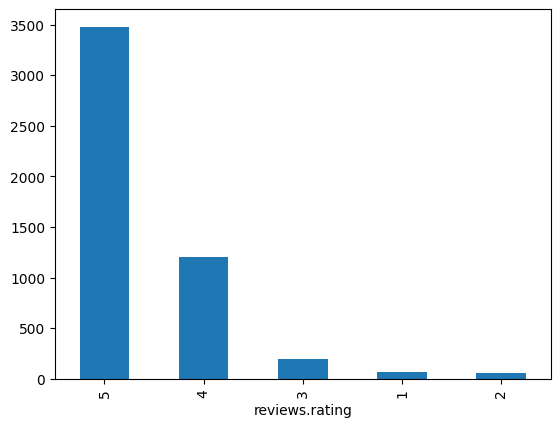

In [15]:
import matplotlib.pyplot as plt

df['reviews.rating'].value_counts().plot(kind='bar')
plt.show()


In [19]:
def categorize_feedback(row):
    if row['sentiment'] == 'NEGATIVE' and row['reviews.rating'] <= 2:
        return "High Urgency"
    elif row['sentiment'] == 'POSITIVE' and row['reviews.rating'] >= 4:
        return "High Impact"
    else:
        return "Medium"

df['category'] = df.apply(categorize_feedback, axis=1)


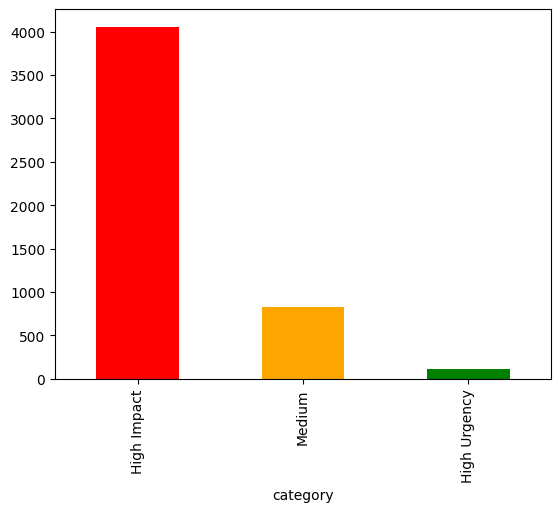

In [20]:
import matplotlib.pyplot as plt

category_counts = df['category'].value_counts()
category_counts.plot(kind='bar', color=['red','orange','green'])
plt.show()


#  Step 8: Output Export  (for Backend)

In [14]:
df.to_csv("analyzed_feedback.csv", index=False)
print("✅ File saved successfully!")


✅ File saved successfully!
